# Descriptive Statistics

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')
%matplotlib inline

Let's get some data

In [187]:
path_to_titanic = '..\\datasets\\titanic\\titanic.csv'
path_to_diabetes = '..\\datasets\\diabetes.csv'
titanic = pd.DataFrame.from_csv(path=path_to_titanic, index_col=None)
diabetes = pd.DataFrame.from_csv(path=path_to_diabetes, index_col=None)

to_fill_na = ['Cholesterol','hdl','ratio','height','weight','waist','hip']
for var in to_fill_na:
    diabetes[var].fillna(diabetes[var].median(), inplace=True)
    
diabetes['frame'].fillna(value='medium', inplace=True)
diabetes['height'] = 2.54*diabetes['height']
diabetes['weight'] = 0.454*diabetes['weight']
diabetes['frame'] = diabetes['frame'].astype('category', categories = ['small','medium','large'], ordered = True)

titanic['sibsp'] = titanic['sibsp'].fillna(1).astype(int)

#Droping columns
titanic.drop(['ticket','boat','body','home.dest'], axis=1, inplace=True)
#Droping rows
titanic.drop([1309], axis=0, inplace=True)

In [188]:
diabetes.shape

(403, 16)

In [24]:
diabetes.head()

,id,Cholesterol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,46,female,157.48,54.934,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,162.56,98.972,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,154.94,116.224,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,170.18,54.026,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,172.72,83.082,medium,138.0,80.0,44.0,41.0,300.0


In [189]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0.0,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1,2.0,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1,2.0,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2.0,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2.0,151.5500,C22 C26,S


## Types of data 

### Numerical variables: 1. Continuous, 2. Discrete

* Continuous: Data that can take on any value in an interval.
* Discrete: Data that can only take on integer values, such as counts.

In [26]:
diabetes['height'].head(10)

0    157.48
1    162.56
2    154.94
3    170.18
4    172.72
5    180.34
6    175.26
7    149.86
8    175.26
9    160.02
Name: height, dtype: float64

In [27]:
titanic['sibsp'].head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    0
8    2
9    0
Name: sibsp, dtype: int32

### Categorical variables: 
* Nominal (categorical): data that can only take on a specific set of values.

* Binary: a special case of categorical with just two categories (0/1, True, False). (dichotomous, logical, indicator)

* Ordinal: Categorical data that has an explicit ordering.

In [28]:
titanic['sex'].head(10)

0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8    female
9      male
Name: sex, dtype: object

In [29]:
titanic['survived'].head(10)

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    0.0
8    1.0
9    0.0
Name: survived, dtype: float64

In [190]:
diabetes['frame'].head(10)

0    medium
1     large
2     large
3     large
4    medium
5     large
6    medium
7    medium
8     large
9     small
Name: frame, dtype: category
Categories (3, object): [small < medium < large]

## Univariate Descriptive Analysis

### Numerical descriptive Statistics: Central tendency

In [191]:
diabetes.shape

(403, 16)

In [192]:
diabetes['hdl'].mean()

50.43424317617866

In [195]:
print "Mean: {}".format(diabetes['height'].mean())
print "Median: {}".format(diabetes['height'].median())
print "Mode: {}".format(stats.mode(diabetes['height']))

Mean: 167.690421836
Median: 167.64
Mode: ModeResult(mode=array([ 160.02]), count=array([43]))


In [199]:
stats.mode(diabetes['height']).mode[0]

160.02000000000001

### Numerical descriptive Statistics: Percentiles, min and max

In [207]:
percentiles = np.arange(5, 100, 5)
#scores = stats.scoreatpercentile(diabetes['height'], per = percentiles)
scores = np.percentile(diabetes['height'], q = percentiles)
print "Min: {}".format(diabetes['height'].min())
print "Max: {}".format(diabetes['height'].max())
print "==== Percentiles ==="
for (per, score) in zip(percentiles, scores):
    print "the {}th percentile is {} because {}% of the values are below or equal to {}".format(per, score, per, score)

Min: 132.08
Max: 193.04
==== Percentiles ===
the 5th percentile is 152.4 because 5% of the values are below or equal to 152.4
the 10th percentile is 154.94 because 10% of the values are below or equal to 154.94
the 15th percentile is 157.48 because 15% of the values are below or equal to 157.48
the 20th percentile is 160.02 because 20% of the values are below or equal to 160.02
the 25th percentile is 160.02 because 25% of the values are below or equal to 160.02
the 30th percentile is 162.56 because 30% of the values are below or equal to 162.56
the 35th percentile is 162.56 because 35% of the values are below or equal to 162.56
the 40th percentile is 165.1 because 40% of the values are below or equal to 165.1
the 45th percentile is 165.1 because 45% of the values are below or equal to 165.1
the 50th percentile is 167.64 because 50% of the values are below or equal to 167.64
the 55th percentile is 167.64 because 55% of the values are below or equal to 167.64
the 60th percentile is 170.1

In [35]:
diabetes['height'].quantile(q=percentiles/100.0)

0.1    154.94
0.2    160.02
0.3    162.56
0.4    165.10
0.5    167.64
0.6    170.18
0.7    172.72
0.8    175.26
0.9    180.34
Name: height, dtype: float64

### Numerical descriptive Statistics: Dispersion

## The tipical deviation (or distance) from the mean is 9.89 cm

In [36]:
print "Standard Deviation: {}".format(diabetes['height'].std())
print "Range: {}".format(diabetes['height'].max() - diabetes['height'].min())
print "Inter-Quartile Range: {}".format(np.diff(stats.scoreatpercentile(diabetes['height'], per=np.array([0.25,0.75]))))

Standard Deviation: 9.89093874334
Range: 60.96
Inter-Quartile Range: [ 7.6073]


#### Interpreting dispersion: What can you say about the following results?

In [202]:
print 'Means of HDL by Frame:'
diabetes.groupby('frame')['hdl'].mean()

Means of HDL by Frame:


frame
small     55.451923
medium    50.836735
large     44.601942
Name: hdl, dtype: float64

In [203]:
print 'Standard Deviation of HDL by Frame:'
diabetes.groupby('frame')['hdl'].std()

Standard Deviation of HDL by Frame:


frame
small     17.654109
medium    17.980442
large     13.364674
Name: hdl, dtype: float64

In [208]:
diabetes['height'][diabetes['height']<147.90]

11     147.32
205    139.70
284    132.08
371    147.32
373    147.32
380    142.24
Name: height, dtype: float64

In [211]:
len(diabetes['height'][diabetes['height']>187.472])

11

In [213]:
1 - (11+6.)/403.0

0.9578163771712159

In [206]:
print 167.690421836 - 2*9.89093874334
print 167.690421836 + 2*9.89093874334

147.908544349
187.472299323


## "95.7% of the observations in the height variable are within 2 standard deviations from the mean"

In [205]:
print diabetes['height'].mean()
print diabetes['height'].std()

167.690421836
9.89093874334


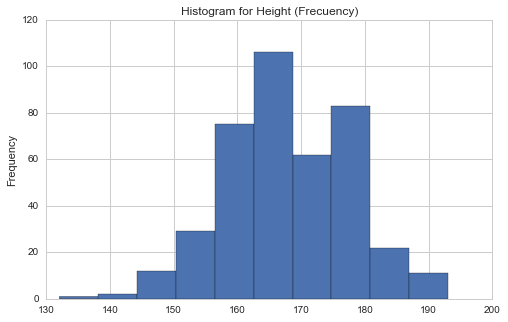

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
diabetes['height'].plot(kind='hist', title="Histogram for Height (Frecuency)", ax=ax);

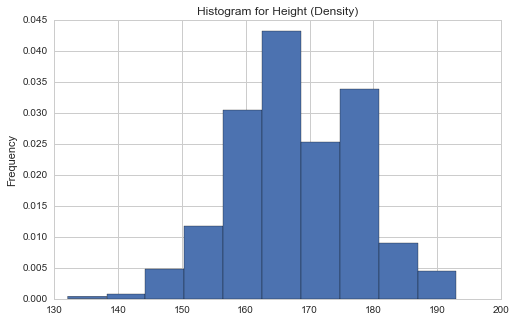

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
diabetes['height'].plot(kind='hist', title="Histogram for Height (Density)", normed=1, ax=ax);

## Describing Discrete Data

In [204]:
print "Mean: {}".format(titanic['sibsp'].mean())
print "Mode: {}".format(stats.mode(titanic['sibsp']))

Mean: 0.498854087089
Mode: ModeResult(mode=array([0]), count=array([891]))


In [41]:
titanic['sibsp'].value_counts().sort_index()

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: sibsp, dtype: int64

In [42]:
sibsp_value_counts = titanic['sibsp'].value_counts().sort_index()
for i, x in zip(sibsp_value_counts.index, sibsp_value_counts):
    print "{}: {:0.2f}%".format(i, 100*x/1309.0)

0: 68.07%
1: 24.37%
2: 3.21%
3: 1.53%
4: 1.68%
5: 0.46%
8: 0.69%


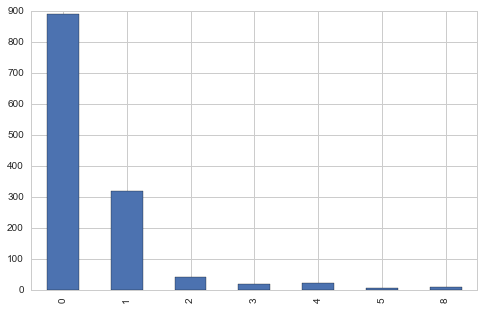

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
sibsp_value_counts.plot(kind='bar', xticks=range(9), ax=ax)

## Categorical Data

In [214]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [215]:
sex_value_counts = titanic['sex'].value_counts()
for i, x in zip(sex_value_counts.index, sex_value_counts):
    print "{}: {:0.2f}%".format(i, 100*x/1309.0)

male: 64.40%
female: 35.60%


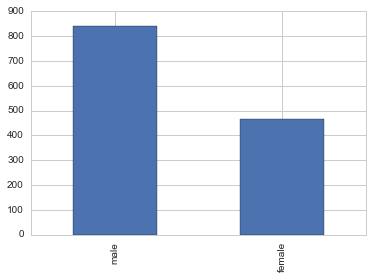

In [217]:
titanic['sex'].value_counts().plot(kind='bar', stacked=True)

## Bivariate Descriptive Statistics

### Two numerical variables

In [220]:
np.corrcoef(diabetes["hdl"][diabetes["Cholesterol"]<390], diabetes["Cholesterol"][diabetes["Cholesterol"]<390])[0,1]

0.23421036964806521

https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

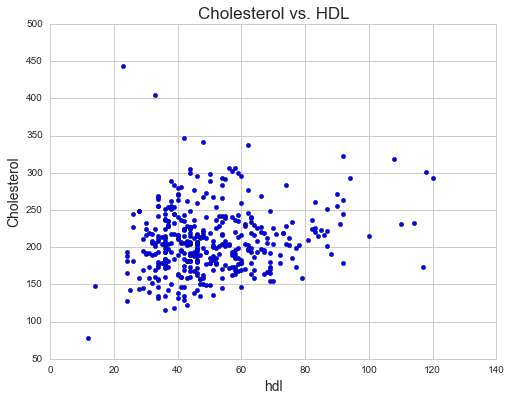

In [62]:
# Y = Cholesterol; X = hdl
# 1.1 Traditional scatter plot with matplotlib
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(diabetes["hdl"], diabetes["Cholesterol"])
ax.set_title("Cholesterol vs. HDL", size = 17)
ax.set_xlabel("hdl", size = 14)
ax.set_ylabel("Cholesterol", size = 14)
plt.show()

### One Categorical vs. a Numerical Variable

In [221]:
diabetes.groupby('frame')['hdl'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
frame,,,,,,,,
small,104.0,55.451923,17.654109,28.0,42.75,51.5,65.25,110.0
medium,196.0,50.836735,17.980442,14.0,38.75,46.5,59.00,120.0
large,103.0,44.601942,13.364674,12.0,36.00,43.0,52.00,81.0


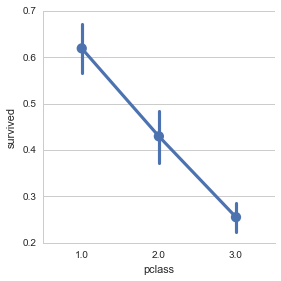

In [224]:
sns.factorplot(x='pclass', y = 'survived', data=titanic)

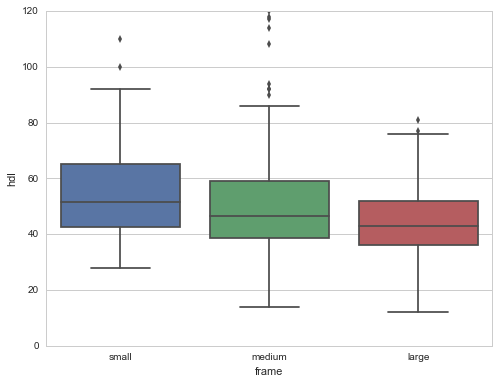

In [225]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = "frame", y = "hdl", data = diabetes, order = ["small","medium","large"], ax=ax);

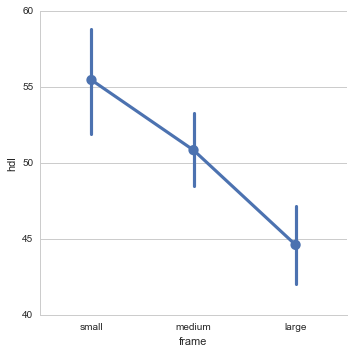

In [51]:
sns.factorplot(x = "frame", y = "hdl", data = diabetes, kind="point", size = 5, order = ["small","medium","large"]);

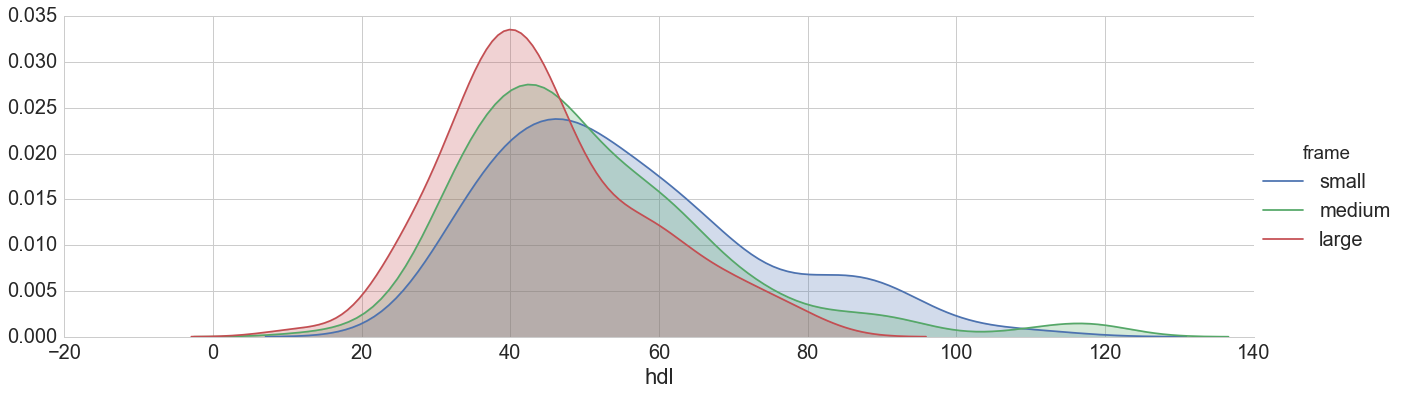

In [226]:
# Comparison of distributions
sns.set_context('notebook', font_scale=2)
fig = sns.FacetGrid(diabetes, hue = "frame", aspect = 3, size = 6)
fig.map(sns.kdeplot, "hdl", shade = True)
fig.add_legend();

### Two categorical variables

In [228]:
diabetes.groupby(['frame','gender']).size().unstack()

gender,female,male
frame,,
small,69,35
medium,123,73
large,42,61


In [184]:
100*diabetes.groupby(['frame','gender']).size().unstack()/diabetes.gender.value_counts()

gender,female,male
frame,,
small,29.487179,20.710059
medium,52.564103,43.195266
large,17.948718,36.094675


In [229]:
100*diabetes.groupby(['gender','frame']).size().unstack()/diabetes.frame.value_counts()

,large,medium,small
gender,,,
female,40.776699,62.755102,66.346154
male,59.223301,37.244898,33.653846


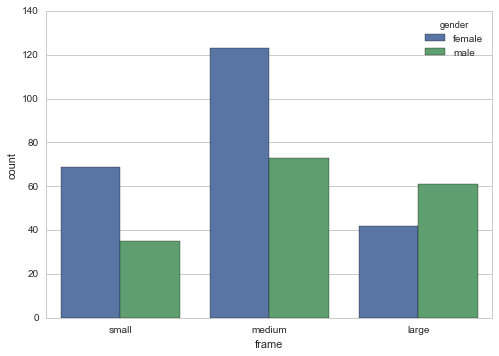

In [132]:
sns.set_context('notebook', font_scale=1)
sns.countplot(x = "frame", hue = "gender", data = diabetes);

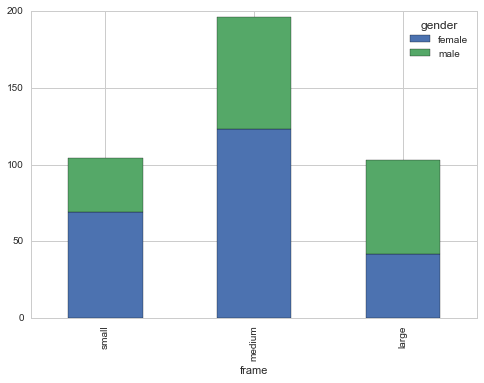

In [130]:
diabetes.groupby(['frame','gender']).size().unstack().plot(kind='bar', stacked=True)